# Contractility single video analysis
#### Author: Youngbin Kim
#### Last updated: 02/22/24

This notebook goes over basic analysis of single videos for contractility functional assessment. To analyze multiple videos in a single run, please check the batch analysis notebook.

## Import packages

In [16]:
import beatprofiler as bp
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

## Analyze data

In [17]:
# file path of your video
file_path = r"sample videos/bf spheroid 20fps.gif"

# create a video object to handle reading the video and extracting trace
video = bp.BFVideo(file_path=file_path, frame_rate=20)

# calculate mask
video.calculate_mask(method="max fft")

# extract trace
video.calculate_trace(reference="auto")

# create a trace object to handle drift correction and peak identification/analysis
trace = bp.Trace(data=video.trace[1:], frame_rate=video.frame_rate)

# detect and analyze beats
trace.analyze_peaks(min_prominence=0.2)

## Plot and Visualize data

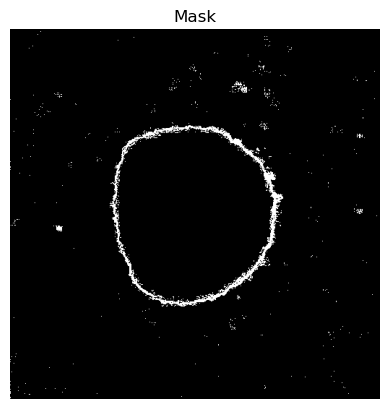

In [18]:
# mask show
plt.imshow(video.mask, cmap="gray")
plt.axis('off')
plt.title("Mask");

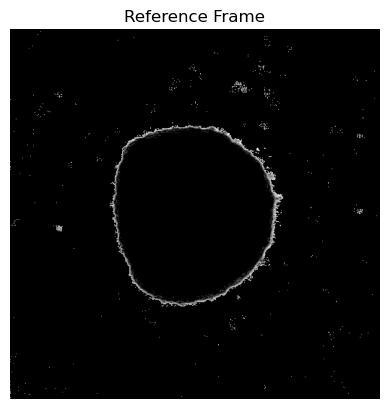

In [19]:
# Reference Frame show
plt.imshow(video.reference_frame, cmap="gray")
plt.axis('off')
plt.title("Reference Frame");

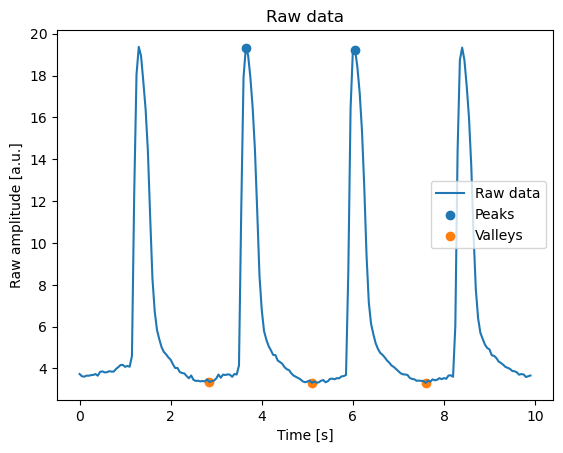

In [20]:
plt.plot(np.arange(len(trace.raw_data))/trace.frame_rate, trace.raw_data, label="Raw data")
plt.scatter(trace.peaks/trace.frame_rate,trace.raw_data[trace.peaks], label = "Peaks")
plt.scatter(trace.valleys/trace.frame_rate,trace.raw_data[trace.valleys], label = "Valleys")
plt.legend()
plt.title("Raw data")
plt.xlabel("Time [s]")
plt.ylabel("Raw amplitude [a.u.]");

Text(0, 0.5, 'Velocity [a.u.]')

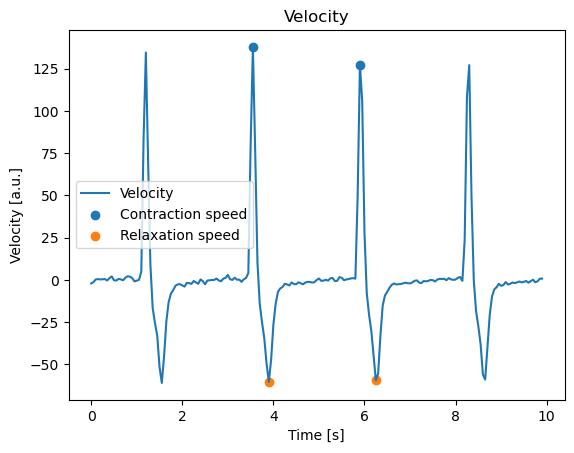

In [21]:
plt.plot(np.arange(len(trace.velocity))/trace.frame_rate, trace.velocity, label="Velocity")
plt.scatter(trace.contraction_speeds_index/trace.frame_rate, trace.velocity[trace.contraction_speeds_index], label = "Contraction speed")
plt.scatter(trace.relaxation_speeds_index/trace.frame_rate, trace.velocity[trace.relaxation_speeds_index], label = "Relaxation speed")
plt.legend()
plt.title("Velocity")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [a.u.]")

In [22]:
# summary
trace.feature_summary.dropna()

num beats                          2.000000
beat frequency [bpm]              25.000000
RMSSD [s]                          2.400000
mean RR interval [s]               2.400000
mean contract50 [s]                0.117386
mean contract90 [s]                0.166099
mean contraction speed [a.u.]    132.574769
mean fw90m [s]                     0.686305
mean fwhm [s]                      0.354967
mean raw amplitude [a.u.]         15.942978
mean relax50 [s]                   0.237581
mean relax90 [s]                   0.520205
mean relaxation speed [a.u.]      59.836543
mean tau [s]                       0.271597
SDRR [s]                           0.000000
std contract50 [s]                 0.021825
std contract90 [s]                 0.030346
std contraction speed [a.u.]       7.390608
std fw90m [s]                      0.013616
std fwhm [s]                       0.000240
std raw amplitude [a.u.]           0.039950
std relax50 [s]                    0.022065
std relax90 [s]                 

In [23]:
# peak summary
trace.peak_summary.dropna(how="all", axis=1)

,beat index,tau [s],fwhm [s],contract50 [s],relax50 [s],fw90m [s],contract90 [s],relax90 [s],raw amplitude [a.u.],contraction speed [a.u.],relaxation speed [a.u.]
None,73,0.287281,0.355136,0.101953,0.253183,0.676677,0.144642,0.532035,15.971227,137.800717,60.303797
None,121,0.255913,0.354797,0.132818,0.221979,0.695932,0.187557,0.508375,15.914729,127.348820,59.369288
